In [1]:
'''
    This function will be used for
    -   taking a dataset in
    -   temporary removal of all targets
    -   and analyzing orthogonality with PCA decomposition
'''
#imports
import pandas as pd
import numpy as np

#read in data - NOTE changeable name
data = pd.read_csv('betaset_tmp.csv')

#remove all targets - NOTE current solution, may change
data = data.drop(columns=[f't_{i}' for i in range(1,61)])

In [2]:
#introduce PCA

from sklearn.decomposition import PCA
pca = PCA()

#normalize before PCA utilization

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()

#fit scaler
X_normalized = scaler.fit_transform(data)
#fit pca
X = pca.fit_transform(X_normalized)

#print(pca.get_covariance()) #optional printout, buggy in jn

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[2.38626643e-01 1.84686866e-01 1.45796790e-01 9.96330213e-02
 4.37968575e-02 3.70149454e-02 2.94112962e-02 1.89543584e-02
 1.62072737e-02 1.53644602e-02 1.10563700e-02 8.34935104e-03
 7.56288289e-03 5.88436653e-03 5.68854811e-03 4.56210488e-03
 4.50147520e-03 3.42059780e-03 3.24013847e-03 3.13460577e-03
 2.87637134e-03 2.71547047e-03 2.53336052e-03 2.49714638e-03
 2.23138953e-03 2.17580114e-03 2.08313089e-03 2.04088320e-03
 1.92488985e-03 1.89145523e-03 1.80825062e-03 1.76467075e-03
 1.74265408e-03 1.69307999e-03 1.62710665e-03 1.59688166e-03
 1.57298838e-03 1.55554692e-03 1.53905704e-03 1.51710107e-03
 1.50995011e-03 1.49656525e-03 1.48983527e-03 1.47535070e-03
 1.46457474e-03 1.45955890e-03 1.44935365e-03 1.43879867e-03
 1.43101479e-03 1.42594084e-03 1.42118370e-03 1.41575258e-03
 1.41384903e-03 1.40643199e-03 1.39556284e-03 1.38429780e-03
 1.38160522e-03 1.37489088e-03 1.37052395e-03 1.36067340e-03
 1.35849022e-03 1.35460043e-03 1.34832732e-03 1.34363175e-03
 1.34266612e-03 1.338378

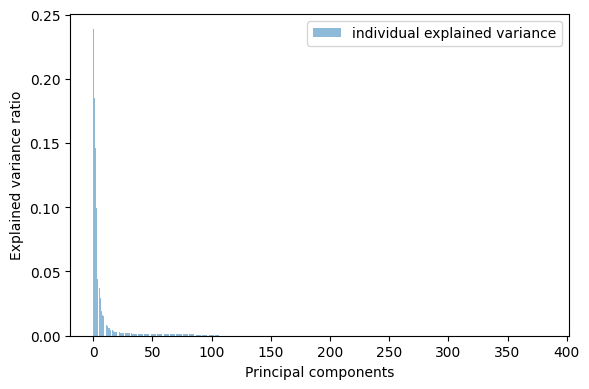

In [3]:
import matplotlib.pyplot as plt

#plot current info collection

plt.figure(figsize=(6, 4))

plt.bar(range(X.shape[1]), explained_variance, alpha=0.5, align='center',
        label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

Working with 383 features



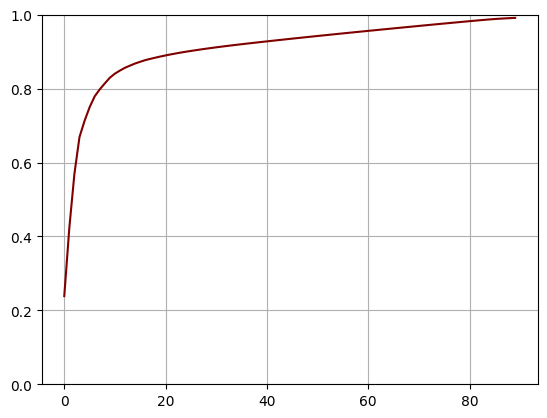

In [4]:
X_normalized = StandardScaler().fit_transform(data)

print(f'Working with {X_normalized.shape[1]} features\n')

dimensionality = 90

data_loss = []
for i in range(dimensionality):
    pca = PCA(n_components = i+1)
    pca.fit(X_normalized)
    X_new = pca.transform(X_normalized)
    retained_variance = np.sum(pca.explained_variance_ratio_)
    data_loss.append(retained_variance)

plt.plot(range(dimensionality), data_loss, color='maroon')
plt.grid()
plt.ylim(0,1)
plt.show()

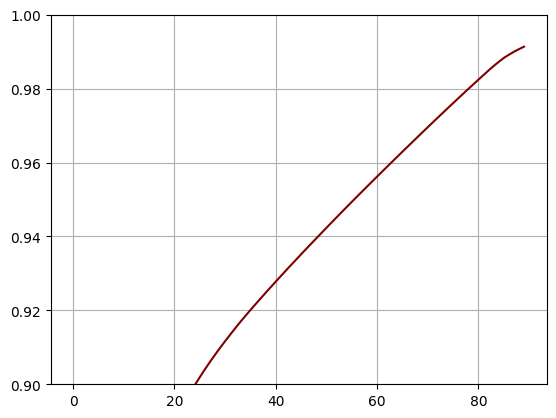

In [5]:
plt.plot(range(dimensionality), data_loss, color='maroon')
plt.grid()
plt.ylim(0.9,1)
plt.show()